<a href="https://colab.research.google.com/github/MeenaCherukuri/AIML-Internship/blob/main/26_5_25_AIML_Internship_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pandas numpy matplotlib seaborn scikit-learn

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

<ipython-input-3-74eda61dacc6>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-3-74eda61dacc6>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

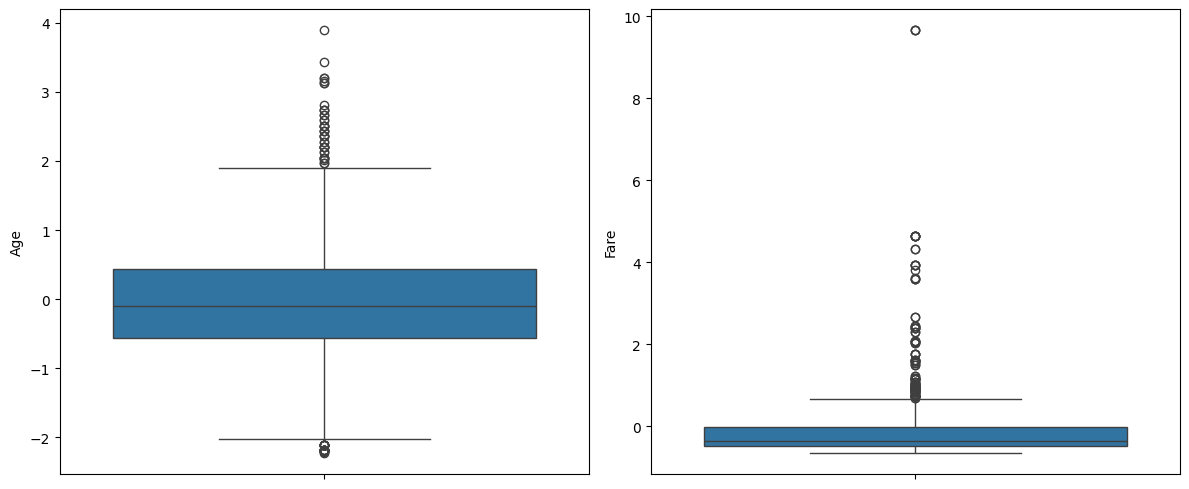

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    1 -0.565736      1      0   
2                        Heikkinen, Miss. Laina    0 -0.258337      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1      0   
4                      Allen, Mr. William Henry    1  0.433312      0      0   
5                              Moran, Mr. James    1 -0.104637      0      0   

             Ticket      Fare  Embarked  
0         A/5 21171 -0.502445         2  
2  STON/O2. 310128

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 2: Load Dataset
# Make sure to update the path to where you've downloaded your dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")

# Step 3: Explore the Data
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Step 4: Handle Missing Values
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many nulls)
df.drop(columns=['Cabin'], inplace=True)

# Step 5: Encode Categorical Columns
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male = 1, female = 0
df['Embarked'] = le.fit_transform(df['Embarked'])

# Step 6: Feature Scaling (Standardization)
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Step 7: Visualize Outliers with Boxplots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Age')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Fare')
plt.tight_layout()
plt.show()

# Optional: Remove outliers based on IQR method (for Fare as example)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]

# Final Check
print(df.isnull().sum())
print(df.head())
